# Explanatory Visualizations

In this notebook, I compile 5 data visualizations that I created in the 3 other data analysis notebooks. Since I created this notebook, I've created addition visualizations, which can be seen in the `data_analysis_assignment_6`, `data_analysis_assignment_7`, and `final_blog_post` notebooks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

### Table of Contents
- Uploading Data
- 1. Beauty vs. Number of Followers (scatter plot)
- 2. Working in Well-known Companies: Premium vs. Regular Users (bar plot)
- 3. Age vs. Position Duration (scatter plot)
- 4. New vs. Experienced Position Titles (word cloud)
- 5. 20 Most Racially Diverse Fortune 500 Companies (bar plot)

**1. Upload Fortune 500 data**

In [3]:
f_500 = pd.read_csv('../data/clean/Fortune500.csv', encoding='latin-1')

**2. Upload first out of two datasets**

In [4]:
linkedin_original = pd.read_csv('../data/clean/linkedin_original.csv', encoding='latin-1')

In [5]:
f_500_check = np.where(linkedin_original.company_name.isin(f_500.company_name), True, False)
linkedin_original['f_500_check'] = f_500_check

**3. Upload second out of two datasets**

In [6]:
linkedin_updated = pd.read_csv('../data/clean/linkedin_updated.csv', encoding='latin-1')

## 1. Beauty vs. Number of Followers

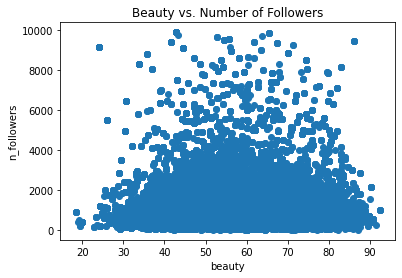

In [7]:
linkedin_original = linkedin_original[linkedin_original['n_followers'] != 0]
linkedin_original = linkedin_original[linkedin_original['n_followers'] <10000] 
plt.scatter(linkedin_original['beauty'], linkedin_original['n_followers'])
plt.xlabel('beauty')
plt.ylabel('n_followers')
plt.title('Beauty vs. Number of Followers');

The scatter plot above represents the relationship between LinkedIn User's beauty and their number of followers. This is interesting to me because I'm curious as to whether a higher beauty score will result in a higher number of followers and, ultimately, result in better job prospects. However, there doesn't seem to be a strong correlation between the two variables based on the scatter plot.

## 2. Working in Well-known Companies: Premium vs. Regular Users

In [8]:
unique_companies_df = linkedin_updated.groupby(['companyName']).agg({'companyFollowerCount':'mean'})
follower_count_mean = unique_companies_df['companyFollowerCount'].mean()

In [9]:
wellknown_company = linkedin_updated[linkedin_updated['companyFollowerCount']>follower_count_mean]
premium_wk = wellknown_company[wellknown_company['isPremium'] == 1.0]
regular_wk = wellknown_company[wellknown_company['isPremium'] == 0.0]
premium_wk_prop = len(premium_wk)/len(wellknown_company)
regular_wk_prop = len(regular_wk)/len(wellknown_company)

In [10]:
lesserknown_company = linkedin_updated[linkedin_updated['companyFollowerCount']<follower_count_mean]
premium_lk = lesserknown_company[lesserknown_company['isPremium'] == 1.0]
regular_lk = lesserknown_company[lesserknown_company['isPremium'] == 0.0]
premium_lk_prop = len(premium_lk)/len(lesserknown_company)
regular_lk_prop = len(regular_lk)/len(lesserknown_company)

In [11]:
membership = pd.DataFrame({'User Type' : [ 'Premium', 'Regular'],
                      'Lesser Known Company' : [premium_lk_prop, regular_lk_prop],
                      'Well Known Company' : [premium_wk_prop, regular_wk_prop],})

<AxesSubplot:xlabel='User Type'>

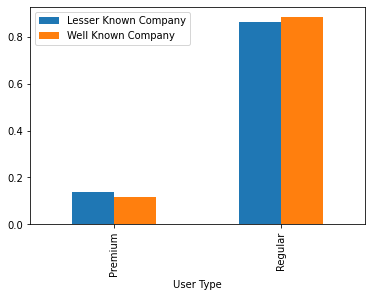

In [12]:
membership.plot(kind='bar', x='User Type')

The bar plot above shows that the proportion of Premium LinkedIn users is lower among the population of users working in well-known companies, compared to the proportion among users working in lesser-known companies. This suggests that although LinkedIn promotes the perks of their Premium membership, the investment might not be worth it after all.

## 3. Age vs. Position Duration

In [13]:
women = linkedin_updated[linkedin_updated['genderEstimate']==1.0]
men = linkedin_updated[linkedin_updated['genderEstimate']==0.0]

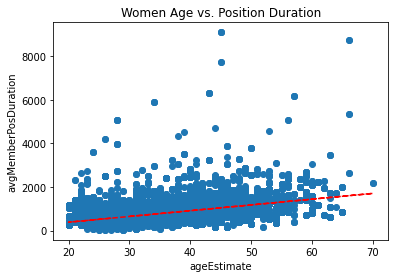

In [14]:
women.dropna(inplace=True)
x = women['ageEstimate']
y = women['avgMemberPosDuration']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('ageEstimate')
plt.ylabel('avgMemberPosDuration')
plt.title('Women Age vs. Position Duration');

plt.show()

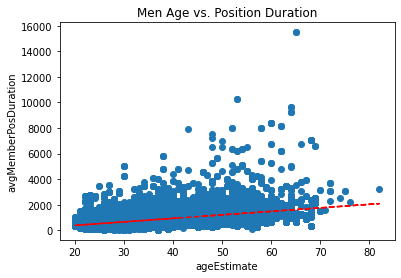

In [15]:
men.dropna(inplace=True)
x = men['ageEstimate']
y = men['avgMemberPosDuration']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('ageEstimate')
plt.ylabel('avgMemberPosDuration')
plt.title('Men Age vs. Position Duration');

plt.show()

40% of managers avoid hiring younger women to get around maternity leave. The underlying assumption is that women hold shorter position durations than men. However, as seen with the trend lines in the two scatter plots, the trend between age and position duration is similar for both men and women. Position duration increases with age, and this trend doesn't discriminate based on gender.

## 4. New vs. Experienced Position Titles

In [16]:
new = linkedin_updated[linkedin_updated['ageEstimate']<=30]
experienced = linkedin_updated[linkedin_updated['ageEstimate']>30]

Common Position Titles Among People New to the Job Market

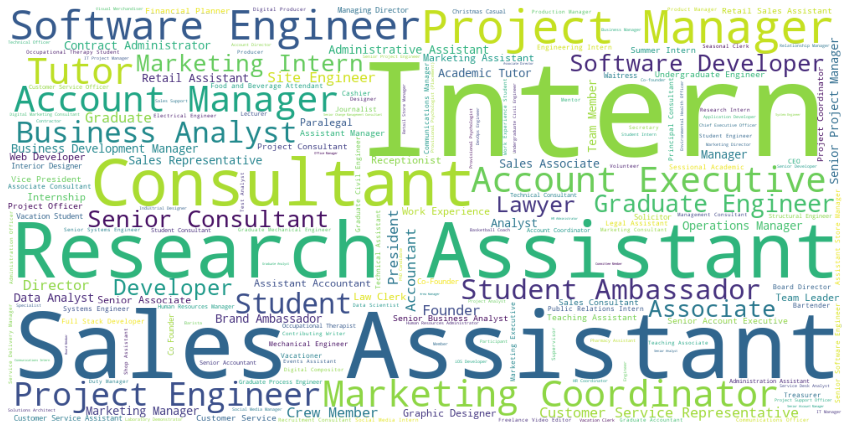

In [17]:
word_could_dict=Counter(new['posTitle'])
wordcloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Common Position Titles Among Experienced People

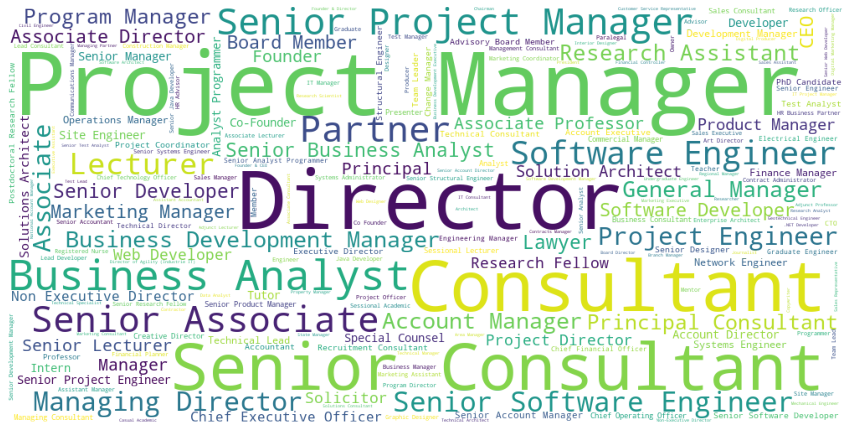

In [18]:
word_could_dict=Counter(experienced['posTitle'])
wordcloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

These word clouds address the question: What are the differences in the types of positions held by people newer to the job market, in comparison to those held by people who are more experienced? As someone entering the job market soon, what are some positions that would welcome newly graduated students, and as I advance in my career, what are the positions that would be open to me? The word clouds give insight on these questions.

## 5. 20 Most Racially Diversity Fortune 500 and Fortune 100 Companies

In [19]:
num_users_per_co = linkedin_original.groupby(['company_name']).agg({'n_positions':'count'})
only_one = num_users_per_co[num_users_per_co['n_positions']==1]
filter_list = list(only_one.index)
linkedin_multiple = linkedin_original[~linkedin_original['company_name'].isin(filter_list)]
linkedin_multiple['minority'] =np.where(linkedin_multiple["ethnicity"].str.contains("Asian|Black"), 1,0) 

In [20]:
f_500_df = linkedin_multiple[linkedin_multiple['f_500_check'] == True]
minority_rank = f_500_df.groupby(['company_name']).agg({'minority':'mean'}).sort_values(by='minority', ascending=False)
f500_top_20 = minority_rank.head(20)

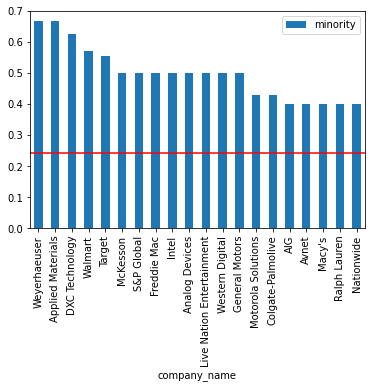

In [21]:
f500_top_20.plot(kind='bar')
plt.axhline(y=linkedin_multiple['minority'].mean(), color='r', linestyle='-')

The bar plot above shows the 20 most racially diverse companies on the Fortune 500 list. The horizontal line is the average percentage of minorities across all companies in the dataset. This graph support the idea that Fortune 500 companies do, indeed, care about racial diversity, just as they state they do. In Block 5 of Assignment 6, I found that there's a higher proportion of Asians and Blacks working in Fortune 500 companies than in the overall dataset. These are good signs that Fortune 500 companies are heading in the right direction towards the diverse and inclusive vision that they have.